In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 3: New York City energy production

In [2]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/nyc_load.csv'
nyc = pd.read_csv(url,index_col='DATE',parse_dates=True)
nyc.head()

,temperature,load
DATE,,
2019-01-01,51,1743.769550
2019-01-02,38,1970.869388
2019-01-03,41,1968.927778
2019-01-04,39,1909.855172
2019-01-05,44,1805.748276


**Column descriptions:**

| column | description |
| :-- | --: |
| temperature | average temperature (in degrees Fahrenheit) |
| load | average electricity produced (in Watts) in NYC central zone (see the picture below) |

**New York City zones:**

![zones](nyc_zones.png)

**Part 1:** Plot energy produced (`load` column) against average daily temperature (`temperature` column)

In [4]:
nyc.columns

Index(['temperature', 'load'], dtype='object')

<AxesSubplot:xlabel='temperature', ylabel='load'>

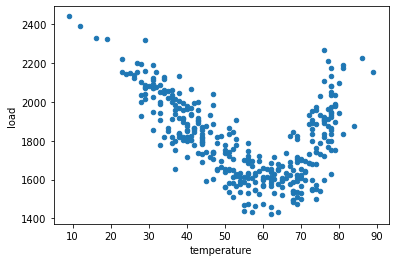

In [97]:
nyc.plot.scatter(x='temperature', y='load')

**Part 2:** Build a pipeline with the following steps: scaler + polynomial features (degree=2) + linear regression model

In [88]:
# your code here
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('reg', LinearRegression())
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=100, include_bias=False)),
                ('reg', LinearRegression())])

**Part 3:** Fit the pipeline to the data.

In [98]:
# your code here
X = nyc.temperature.values.reshape(-1,1)
y = nyc.load.values.reshape(-1,1)
pipe.fit(X,y)
y_pred = pipe.predict(X)


Plot the data and the regression model.

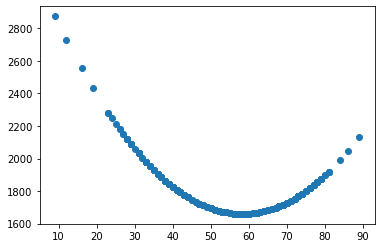

In [99]:
# your code here
plt.scatter(x=X, y=y_pred)

**Part 4:** Set the polynomial features degree to 100.

In [116]:
# your code here
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('reg', LinearRegression())
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features',
                 PolynomialFeatures(degree=100, include_bias=False)),
                ('reg', LinearRegression())])

Fit the pipeline to the model.

In [117]:
# your code here
pipe.fit(X,y)
y_pred = pipe.predict(X)

Plot the data and the regression model

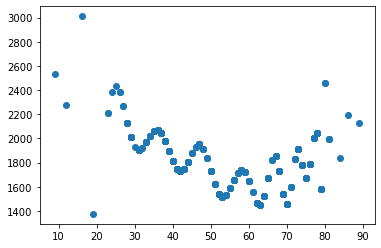

In [118]:
# your code here
plt.scatter(x=X, y=y_pred)

**Part 5:** Split the data into training and testing sets

In [119]:
# your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

**Part 6:** Plot the regression model root mean squared error on the training and testing sets as a function of the polynomial features degree.

# 100 degrees

mse on training set: 104.66157396640799
mse on testing set: 136.37402397571927


(0.0, 3000.0)

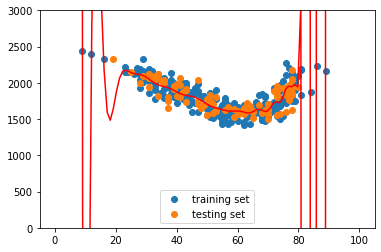

In [128]:
# your code here
from sklearn.metrics import mean_squared_error
import math

# fit the pipeline to the training set
pipe.fit(X_train,y_train)
# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot traiing and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()


m_plot = 100
x_plot = np.linspace(0,100,m_plot).reshape(m_plot,1) # m_plot rows, 1 column
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

# compute mean squared error (MSE)
mse_train = math.sqrt(mean_squared_error(y_train,y_train_pred))
mse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
print('mse on training set:', mse_train)
print('mse on testing set:', mse_test)
# Note, these mean squared error values are quite high, maybe I incorrectly setup the data?

plt.ylim([0,3000])


# 2 Degrees

mse on training set: 104.66157396640799
mse on testing set: 136.37402397571927


(0.0, 3000.0)

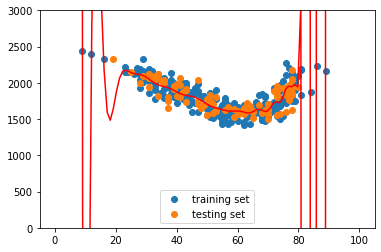

In [126]:
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('reg', LinearRegression())
])
pipe
pipe.fit(X,y)
y_pred = pipe.predict(X)

# fit the pipeline to the training set
pipe.fit(X_train,y_train)
# make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# plot traiing and testing set
plt.scatter(X_train,y_train,label='training set')
plt.scatter(X_test,y_test,label='testing set')
plt.legend()


m_plot = 100
x_plot = np.linspace(0,100,m_plot).reshape(m_plot,1) # m_plot rows, 1 column
y_plot = pipe.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

# compute mean squared error (MSE)
mse_train = math.sqrt(mean_squared_error(y_train,y_train_pred))
mse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
print('mse on training set:', mse_train)
print('mse on testing set:', mse_test)
# Note, these mean squared error values are quite high, maybe I incorrectly setup the data?

plt.ylim([0,3000])
